# Problem Set 9

## Submitted by [Zhihan Yu]

### Problem 1(a)

In [2]:
import pandas as pd
df = pd.read_csv('data/strongdrink.txt')

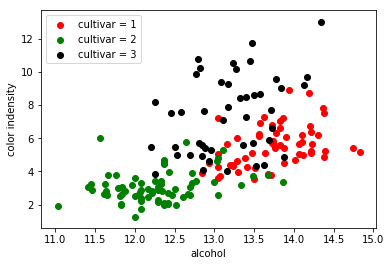

In [4]:
import matplotlib.pyplot as plt

alco = df['alco']
color_int = df['color_int']
plt.scatter(alco[df['cultivar']==1],color_int[df['cultivar']==1], \
            color = 'r', label = 'cultivar = 1')
plt.scatter(alco[df['cultivar']==2],color_int[df['cultivar']==2], \
            color = 'g', label = 'cultivar = 2')
plt.scatter(alco[df['cultivar']==3],color_int[df['cultivar']==3], \
            color = 'k', label = 'cultivar = 3')
plt.xlabel('alcohol')
plt.ylabel('color indensity')
plt.legend()
plt.show()


### Problem 1(b)

In [9]:
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']
LR = LogisticRegression(random_state=25)
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
rscv_lr = RandomizedSearchCV(LR, param_dist1, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')


lr = rscv_lr.fit(X, y)
print('Optimal tuning parameter values:', lr.best_params_)
print('MSE of optimal result:', abs(lr.best_score_))

Optimal tuning parameter values: {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of optimal result: 0.11931818181818182


### Problem 1(c)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
RFC = RandomForestClassifier(random_state=25)
rscv_rf = RandomizedSearchCV(RFC, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rf = rscv_rf.fit(X, y)
print('Optimal tuning parameter values:', rf.best_params_)
print('MSE of the optimal result:', abs(rf.best_score_))

Optimal tuning parameter values: {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
MSE of the optimal results: 0.14772727272727273


### Problem 1(d)

In [12]:
from sklearn.svm import SVC

param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
svc = SVC(random_state=25)
rscv_SVC = RandomizedSearchCV(svc, param_dist3, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

random_SVC = rscv_SVC.fit(X, y)
print('Optimal tuning parameter values:\n', random_SVC.best_params_)
print('MSE of the optimal result:', abs(random_SVC.best_score_))

Optimal tuning parameter values:
 {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE of the optimal results: 0.14772727272727273


### Problem 1(e)

In [15]:
from sklearn.neural_network import MLPClassifier

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
mlp = MLPClassifier(random_state=25)
rscv_MLP = RandomizedSearchCV(mlp, param_dist4, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

random_MLP = rscv_MLP.fit(X, y)
print('Optimal tuning parameter values:\n', random_MLP.best_params_)
print('MSE of the optimal results:', abs(random_MLP.best_score_))

Optimal tuning parameter values:
 {'activation': 'relu', 'alpha': 2.158912119744818, 'hidden_layer_sizes': 68}
MSE of the optimal results: 0.19318181818181818


### Problem 1(f)

Judging from the MSE value, I think the logistic model performs the best because of its lowest MSE value.